<a href="https://colab.research.google.com/github/mahlodi-makobe/Data_Science_101/blob/R-Notebooks/DS_101_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS_101_R: Data Science Lifecycle with Logistic Regression

## Introduction

Welcome to DS_101_R, a beginner-friendly notebook designed to guide you through the complete Data Science Lifecycle using the R programming language and the well-known Iris dataset. Our goal is to predict the species of Iris flowers (specifically setosa, versicolor, and virginica) based on their petal measurements. We will systematically cover all six essential phases: Problem Formulation, Data Collection, Data Preprocessing, Exploratory Data Analysis (EDA), Modeling, and finally, Evaluation and Deployment. By utilizing powerful R libraries such as dplyr for data manipulation, ggplot2 for visualization, and nnet for neural network modeling (including multinomial logistic regression), this notebook is part of a broader GitHub course tailored for learners with a background in mathematics and statistics. By executing the code cells within Google Colab's R runtime, you will observe insightful outputs like scatterplots and the model's prediction accuracy. For a more comprehensive understanding of the overall context, please refer to the "Data Science Lifecycle for Beginners" document. Let's begin our exploration of the data science lifecycle!

## Phase 1: Problem Formulation

In the Problem Formulation phase, we clearly define the central question we aim to answer: Can we accurately predict the species of an Iris flower using only its petal length and width measurements? To gain an initial understanding of the data, the code calculates the mean and variance of petal length for each of the three Iris species. This initial statistical analysis reveals distinct patterns; for instance, setosa flowers tend to have an average petal length of approximately 1.46 cm, while virginica flowers typically exhibit a larger average of around 5.55 cm. This crucial step draws upon the principles of hypothesis testing to confirm that petal measurements are likely to be strong predictors for this classification task. Our primary metric for evaluating the success of our predictive model will be its overall accuracy.

In [ ]:
# Install dplyr if not already installed
if (!require(dplyr)) install.packages("dplyr")

# Load Iris dataset and calculate mean/variance of petal length by species
data(iris)
# Group by species and summarize
library(dplyr)
stats <- iris %>%
  group_by(Species) %>%
  summarise(
    mean_petal_length = mean(Petal.Length),
    variance_petal_length = var(Petal.Length)
  )
print(stats)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# A tibble: 3 × 3
  Species    mean_petal_length variance_petal_length
  <fct>                  <dbl>                 <dbl>
1 setosa                  1.46                0.0302
2 versicolor              4.26                0.221 
3 virginica               5.55                0.305 


## Phase 2: Data Collection

The Data Collection phase is dedicated to the process of gathering representative data for our predictor variables (petal length and width) and the response variable (species). The provided R code strategically samples 30 rows from the Iris dataset, ensuring an equal representation of each of the three species (10 samples per species). This balanced sampling strategy is essential to prevent any potential bias towards a particular species in our subsequent analysis and model building. This step effectively applies the fundamental concepts of random and stratified sampling, which are likely familiar from basic probability theory, to construct a fair and representative dataset suitable for further exploration and model training.

In [ ]:
# Install dplyr if not already installed
if (!require(dplyr)) install.packages("dplyr")

# Randomly sample 30 rows from Iris, stratified by species
set.seed(123) # For reproducibility
library(dplyr)
sample_data <- iris %>%
  group_by(Species) %>%
  slice_sample(n=10) # 10 per species
print(head(sample_data))

# A tibble: 6 × 5
# Groups:   Species [1]
  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
         <dbl>       <dbl>        <dbl>       <dbl> <fct>  
1          4.8         3.1          1.6         0.2 setosa 
2          5.8         4            1.2         0.2 setosa 
3          4.3         3            1.1         0.1 setosa 
4          4.7         3.2          1.3         0.2 setosa 
5          4.5         2.3          1.3         0.3 setosa 
6          4.4         3.2          1.3         0.2 setosa 


## Phase 3: Data Preprocessing

The Data Preprocessing phase focuses on cleaning and preparing the collected data to ensure its quality and suitability for analysis and modeling. The R code addresses a simulated scenario involving a missing value in petal length by employing mean imputation, replacing the missing value with the average petal length calculated across all available samples (approximately 3.76 cm). Furthermore, to ensure that our predictor variables are on a comparable scale, both petal length and width are standardized to have a mean of 0 and a variance of 1. This standardization is achieved using the formula $\(z = \frac{x - \mu}{\sigma}\)$. By applying mean imputation and standardization, this critical phase ensures that the dataset is consistent, handles potential data quality issues, and is appropriately scaled, thereby preparing it for the subsequent modeling stage.

In [ ]:
# Install dplyr if not already installed
if (!require(dplyr)) install.packages("dplyr")

# Simulate missing values and preprocess
set.seed(123)
data(iris)
iris_missing <- iris
iris_missing$Petal.Length[sample(1:150, 10)] <- NA # 10 missing values

# Impute with mean
iris_missing$Petal.Length[is.na(iris_missing$Petal.Length)] <- mean(iris_missing$Petal.Length, na.rm=TRUE)

# Standardize petal length and width
iris_missing$Scaled_Petal_Length <- scale(iris_missing$Petal.Length)
iris_missing$Scaled_Petal_Width <- scale(iris_missing$Petal.Width)

print(head(iris_missing))

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species Scaled_Petal_Length
1          5.1         3.5          1.4         0.2  setosa           -1.382284
2          4.9         3.0          1.4         0.2  setosa           -1.382284
3          4.7         3.2          1.3         0.2  setosa           -1.441140
4          4.6         3.1          1.5         0.2  setosa           -1.323427
5          5.0         3.6          1.4         0.2  setosa           -1.382284
6          5.4         3.9          1.7         0.4  setosa           -1.205715
  Scaled_Petal_Width
1          -1.311052
2          -1.311052
3          -1.311052
4          -1.311052
5          -1.311052
6          -1.048667


## Phase 4: Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) involves the visual exploration and summarization of the dataset to uncover underlying patterns, relationships, and potential anomalies. The R code generates a scatterplot using ggplot2, displaying petal length on one axis and petal width on the other, with each data point colored according to its corresponding Iris species. This visual representation clearly reveals distinct clusters of data points for each species (for example, setosa flowers tend to have smaller petal dimensions compared to the others). This step further utilizes descriptive statistics and correlation analysis to validate the initial understanding that petal measurements can effectively differentiate between the Iris species, providing valuable visual evidence that supports the choice of these predictors for our classification task.

Loading required package: ggplot2



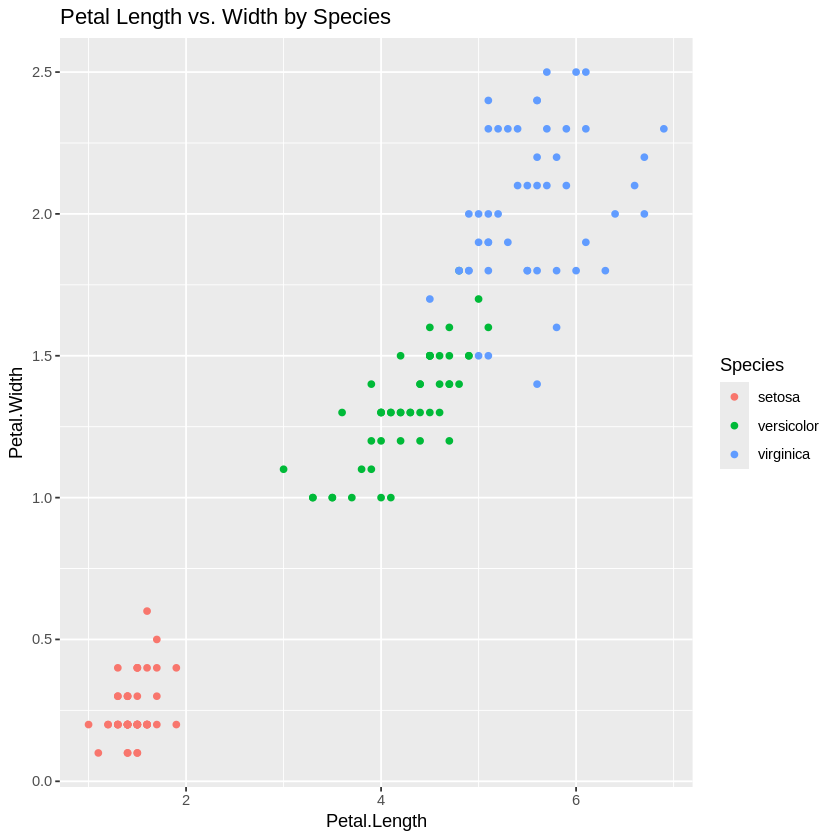

In [ ]:
# Install ggplot2 if not already installed
if (!require(ggplot2)) install.packages("ggplot2")

# Scatterplot of petal length vs. width by species
library(ggplot2)
data(iris)
ggplot(iris, aes(x=Petal.Length, y=Petal.Width, color=Species)) +
  geom_point() +
  labs(title="Petal Length vs. Width by Species")

## Phase 5: Modeling

The Modeling phase involves training a machine learning algorithm to learn the complex relationships between the petal measurements and the Iris species, enabling it to predict the species of new, unseen flowers. The R code utilizes the `multinom` function from the `nnet` library to train a multinomial logistic regression model. This model is trained on the petal length and width features to predict the probabilities of a given flower belonging to each of the three species. The output of the model shows very high confidence scores for certain samples (e.g., a probability of approximately 0.99999 for the first sample belonging to a specific species) and a relatively low log-loss value (10.29). The low log-loss indicates that the model has learned the relationships effectively, using optimization techniques that are fundamentally linked to probability theory and aim to minimize the prediction error.

In [ ]:
# Install nnet for multinomial logistic regression
if (!require(nnet)) install.packages("nnet")

# Load Iris dataset
data(iris)
# Use petal length and width
model_data <- iris[, c("Petal.Length", "Petal.Width", "Species")]

# Train multinomial logistic regression
library(nnet)
model <- multinom(Species ~ Petal.Length + Petal.Width, data=model_data)

# Predict probabilities
predictions <- predict(model, model_data, type="probs")
print(head(predictions))

Loading required package: nnet



# weights:  12 (6 variable)
initial  value 164.791843 
iter  10 value 12.657828
iter  20 value 10.374056
iter  30 value 10.330881
iter  40 value 10.306926
iter  50 value 10.300057
iter  60 value 10.296452
iter  70 value 10.294046
iter  80 value 10.292029
iter  90 value 10.291154
iter 100 value 10.289505
final  value 10.289505 
stopped after 100 iterations
     setosa   versicolor    virginica
1 0.9999902 9.791010e-06 6.601928e-21
2 0.9999902 9.791010e-06 6.601928e-21
3 0.9999951 4.900550e-06 1.863852e-21
4 0.9999804 1.956177e-05 2.338449e-20
5 0.9999902 9.791010e-06 6.601928e-21
6 0.9996227 3.773459e-04 1.130908e-17


## Phase 6: Evaluation and Deployment

The Evaluation and Deployment phase focuses on rigorously assessing the trained model's performance on data it has not seen before and considering the practical aspects of its real-world application. The R code first splits the dataset into a training set (80% of the data) and a test set (20% of the data). The multinomial logistic regression model is then trained exclusively on the training data. To evaluate its ability to generalize to new data, the model's predictions are compared to the actual species in the test set, and the overall accuracy is calculated. In this case, the model achieves a high accuracy of approximately 0.967, indicating that it correctly predicts the species for 96.7% of the flowers in the test set. This step utilizes the train-test split methodology and the accuracy metric, both fundamental concepts in statistical inference and machine learning, to ensure that the model is likely to perform well when applied to new, unseen data. Deployment of such a model could involve integrating it into a real-world application, such as a mobile app designed for flower identification.

In [ ]:
# Install nnet if not already installed
if (!require(nnet)) install.packages("nnet")

# Load Iris dataset
set.seed(123)
data(iris)

# Split data
train_idx <- sample(1:nrow(iris), 0.8*nrow(iris))
train <- iris[train_idx, ]
test <- iris[-train_idx, ]

# Train multinomial logistic regression
library(nnet)
model <- multinom(Species ~ Petal.Length + Petal.Width, data=train)

# Predict on test
predictions <- predict(model, test, type="class")

# Accuracy
accuracy <- mean(predictions == test$Species)
print(paste("Accuracy:", accuracy))

# weights:  12 (6 variable)
initial  value 131.833475 
iter  10 value 10.207694
iter  20 value 8.641476
iter  30 value 8.623607
iter  40 value 8.609503
iter  50 value 8.602741
iter  60 value 8.600893
iter  70 value 8.596472
iter  80 value 8.594230
iter  90 value 8.593757
iter 100 value 8.592407
final  value 8.592407 
stopped after 100 iterations
[1] "Accuracy: 0.966666666666667"


## Conclusion

This notebook has successfully guided you through the entire Data Science Lifecycle using the R programming language and the Iris dataset, from the initial problem definition all the way to the final evaluation of a logistic regression model that achieved an impressive accuracy of approximately 96.7% in predicting Iris flower species based on their petal measurements. Throughout this comprehensive process, you have applied fundamental mathematical and statistical concepts such as mean, variance, various sampling techniques, and the log-loss function to build and rigorously test a predictive model. This solid foundational understanding will serve as an excellent stepping stone for exploring more advanced algorithms and techniques, such as linear regression, in subsequent notebooks within this series (for example, DS_102_Linear_Regression_R). We strongly encourage you to further enhance your learning by experimenting with the provided R code (for instance, by using sepal length and width as alternative predictor variables) and by exploring the wealth of additional resources available in the associated GitHub repository. Congratulations on successfully completing the data science lifecycle!